# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** ___________________  
**Student ID:** ___________________  
**Date:** ___________________

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import time
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [2]:
#  Load your dataset
# Example: data = pd.read_csv('your_dataset.csv')
data = pd.read_csv('Housing.csv')

# Dataset information ( Fill these)
dataset_name = "House Prices"  # e.g., "House Price prediction"
dataset_source = "Kaggle"  # e.g., "UCI ML Repository"
n_samples = 545     # Total number of rows
n_features = 12     # Number of features (excluding target)
problem_type = "regression"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement ( Write 2-3 sentences)
problem_statement = "To predict the price of a house based on various features like area, bedrooms, bathrooms, etc."


# Primary evaluation metric ( Fill this)
primary_metric = "mse,rmse,mae"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification ( Write 2-3 sentences)
metric_justification = "MAE -Choosen since its robust to outliers, RMSE & MSE Square errors for senstivity to large errors"


print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")
# Display the first 5 rows of the training dataset
data.head(5)

Dataset: House Prices
Source: Kaggle
Samples: 545, Features: 12
Problem Type: regression
Primary Metric: mse,rmse,mae


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [3]:
# TODO: Preprocess your data
#1. Handle missing values /Drop Missing values. 
data = data.dropna()

# 2. Separate features and target
X = data.drop('price', axis=1)
y = data['price'].values 

# 3.Encode categorical variables, for better classification
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 4.One-hot encode furnishingstatus
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)
X = X.values

# Preprocessing pipelines
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# TODO: Train-test split(80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train[:5])  # Show first 5 rows using array slicing
# Fill these after preprocessing
train_samples = X_train.shape[0]      # Number of training samples
test_samples = X_test.shape[0]       # Number of test samples
train_test_ratio = .8

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")



Train samples: 436
Test samples: 109
Split ratio: 80.0%


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [4]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def fit(self, X, y,verbose=True):
        """
        TODO: Implement gradient descent training
        
        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history
        
        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape
        
        # TODO: Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # TODO: Implement gradient descent loop
           # Gradient descent loop
        for iteration in range(self.n_iterations):
            # Forward pass: predictions
            y_pred = X @ self.weights + self.bias

            # Compute loss (MSE)
            mse_loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(mse_loss)

            # Compute gradients
            dw = (2 / n_samples) * X.T @ (y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Update weights: w = w - lr * grad_w
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
      
             # Print progress
            if verbose and (iteration % 100 == 0 or iteration == self.n_iterations - 1):
                print(f"Iteration {iteration:4d} | Loss: {mse_loss:.4f}")

        if verbose:
            print(f"\nTraining completed!")
            print(f"Final Loss: {self.loss_history[-1]:.4f}")

    def predict(self, X):
        """Make predictions"""
        return X @ self.weights + self.bias
        """
        TODO: Implement prediction
        
        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        pass  # Replace with your implementation

print("✓ Baseline model class defined")



✓ Baseline model class defined


In [5]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()
baseline_learning_rate=.0125
baseline_n_iterations=1000

#targets normalized
y_train_norm = (y_train - np.mean(y_train)) / np.std(y_train)
print(f"✅ Targets normalized: {np.mean(y_train_norm):.3f} ± {np.std(y_train_norm):.3f}")

# Initialize and train your baseline model
# Loss not reducing after 250 iteration , hence kept iteration as 1000
baseline_model = BaselineModel(learning_rate=baseline_learning_rate ,n_iterations=baseline_n_iterations)
baseline_model.fit(X_train, y_train_norm)

#  Make predictions
baseline_predictions_norm = baseline_model.predict(X_test)
#Denormalize targets
baseline_predictions=baseline_predictions_norm * np.std(y_train) + np.mean(y_train)


baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")



Training baseline model...
✅ Targets normalized: -0.000 ± 1.000
Iteration    0 | Loss: 1.0000
Iteration  100 | Loss: 0.3164
Iteration  200 | Loss: 0.3142
Iteration  300 | Loss: 0.3141
Iteration  400 | Loss: 0.3141
Iteration  500 | Loss: 0.3141
Iteration  600 | Loss: 0.3141
Iteration  700 | Loss: 0.3141
Iteration  800 | Loss: 0.3141
Iteration  900 | Loss: 0.3141
Iteration  999 | Loss: 0.3141

Training completed!
Final Loss: 0.3141
✓ Baseline training completed in 0.02s
✓ Loss decreased from 1.0000 to 0.3141


Training Observation:
Based on above result , we can observer loss is decreasing with each iteration and after 200 iteration loss is not reducing much

## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [6]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch        
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [13, 32, 16, 1] means:
            - 13 input features
            - Hidden layer 1: 32 neurons
            - Hidden layer 2: 16 neurons
            - Output layer: 1 neuron
            Layer 1 (13→32): 13 × 32 = 416 weights + 32 biases = 448
            Layer 2 (32→16): 32 × 16 = 512 weights + 16 biases = 528  
            Layer 3 (16→1):  16 × 1  = 16 weights + 1 bias   = 17
            Toatl Parameter=448+528+17=993

    
    """

    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):

        self.architecture = architecture  # e.g., [13, 32, 16, 1]
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []
        self.parameters = {}
        self.cache = {}

    def initialize_parameters(self):
        """He initialization for better convergence"""
        np.random.seed(42)
        for l in range(1, len(self.architecture)):
            limit = np.sqrt(6.0 / (self.architecture[l-1] + self.architecture[l]))
            self.parameters[f'W{l}'] = np.random.uniform(
                -limit, limit,
                (self.architecture[l-1], self.architecture[l])
            )
            self.parameters[f'b{l}'] = np.zeros((1, self.architecture[l]))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward_propagation(self, X):
        """Forward pass through all layers"""
        self.cache = {'A0': X}
        A = X

        # Hidden layers with ReLU
        for l in range(1, len(self.architecture) - 1):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']
            Z = A @ W + b
            A = self.relu(Z)
            self.cache[f'Z{l}'] = Z
            self.cache[f'A{l}'] = A

        # Output layer with linear activation
        l = len(self.architecture) - 1
        W = self.parameters[f'W{l}']
        b = self.parameters[f'b{l}']
        Z = A @ W + b
        A = Z  # Linear activation
        self.cache[f'Z{l}'] = Z
        self.cache[f'A{l}'] = A

        return A

    def backward_propagation(self, X, y, y_pred):
        """Backward pass using chain rule"""
        m = X.shape[0]
        gradients = {}

        # Output layer gradient
        dA = 2 * (y_pred - y) / m

        # Backprop through layers
        L = len(self.architecture) - 1

        for l in range(L, 0, -1):
            A_prev = self.cache[f'A{l-1}']
            W = self.parameters[f'W{l}']

            # Compute gradients
            dW = A_prev.T @ dA
            db = np.sum(dA, axis=0, keepdims=True)

            gradients[f'dW{l}'] = dW
            gradients[f'db{l}'] = db

            # Backprop to previous layer
            if l > 1:
                dA = (dA @ W.T) * self.relu_derivative(self.cache[f'Z{l-1}'])

        return gradients

    def update_parameters(self, gradients):
        """Update parameters using gradient descent"""
        for l in range(1, len(self.architecture)):
            self.parameters[f'W{l}'] -= self.lr * gradients[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * gradients[f'db{l}']

    def fit(self, X, y):
        """Train the MLP"""
        self.initialize_parameters()
        y = y.reshape(-1, 1)

        for iteration in range(self.n_iterations):
            # Forward pass
            y_pred = self.forward_propagation(X)

            # Compute loss
            mse_loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(mse_loss)

            # Backward pass
            gradients = self.backward_propagation(X, y, y_pred)

            # Update parameters
            self.update_parameters(gradients)

        return self

    def predict(self, X):
        """Make predictions"""
        A = X
        for l in range(1, len(self.architecture) - 1):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']
            Z = A @ W + b
            A = self.relu(Z)

        l = len(self.architecture) - 1
        W = self.parameters[f'W{l}']
        b = self.parameters[f'b{l}']
        Z = A @ W + b
        A = Z  # Linear

        return A

    print("✓ MLP class defined")

✓ MLP class defined


In [7]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()
n_features = X_train.shape[1] 
mlp_learning_rate=.01
mlp_n_iterations=1000

#targets normlized
y_train_norm = (y_train - np.mean(y_train)) / np.std(y_train)
print(f"✅ Targets normalized: {np.mean(y_train_norm):.3f} ± {np.std(y_train_norm):.3f}")

#  Define your architecture and train MLP
mlp_architecture = [n_features,32, 16, 1]  # Example: [n_features, 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=mlp_learning_rate, n_iterations=mlp_n_iterations)
mlp_model.fit(X_train, y_train_norm)

# Make predictions
mlp_predictions_norm = mlp_model.predict(X_test)

#Denormalize targets
mlp_predictions=mlp_predictions_norm * np.std(y_train) + np.mean(y_train)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
✅ Targets normalized: -0.000 ± 1.000
✓ MLP training completed in 0.15s
✓ Loss decreased from 1.1848 to 0.2170


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [8]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    Calculate appropriate metrics based on problem type
    
    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}
    
    if problem_type == "regression":
            # Mean Squared Error
        mse = np.mean((y_true - y_pred) ** 2)
        
        # Root Mean Squared Error
        rmse = np.sqrt(mse)
        
        # Mean Absolute Error
        mae = np.mean(np.abs(y_true - y_pred))
        
        # R² Score
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
        
        metrics = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }
        
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # Calculate classification metrics
        pass
    
    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'MSE': np.float64(1754318206109.4983), 'RMSE': np.float64(1324506.7784309366), 'MAE': np.float64(970042.389593185), 'R²': np.float64(0.6529243594204777)}

MLP Model Performance:
{'MSE': np.float64(8045311554856.767), 'RMSE': np.float64(2836425.841593037), 'MAE': np.float64(2187775.7817881173), 'R²': np.float64(-172.4942669183306)}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

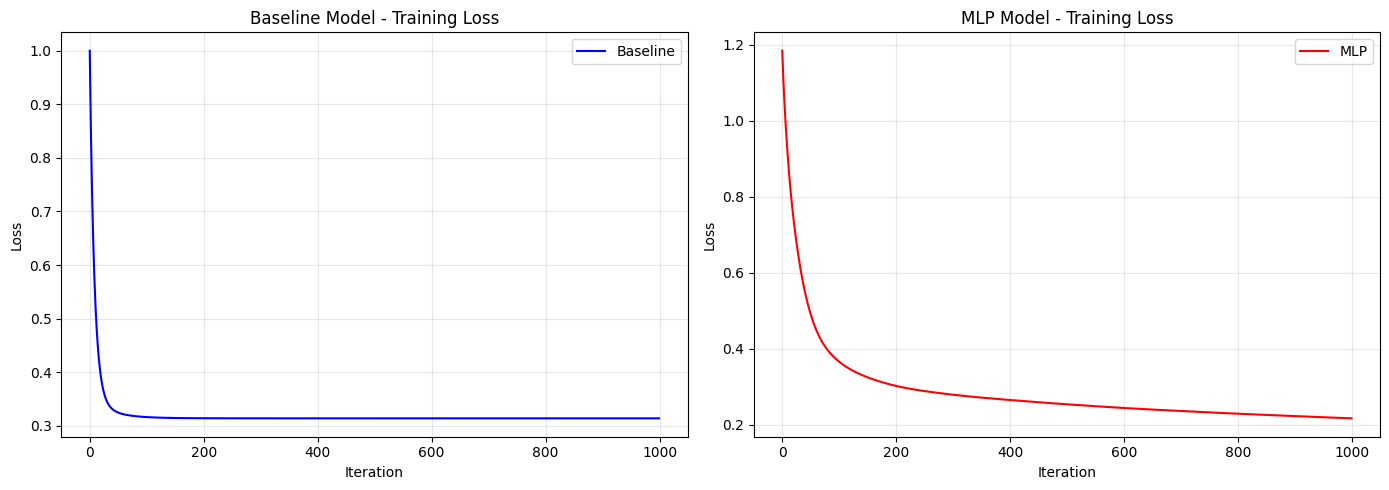

In [9]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
#  Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

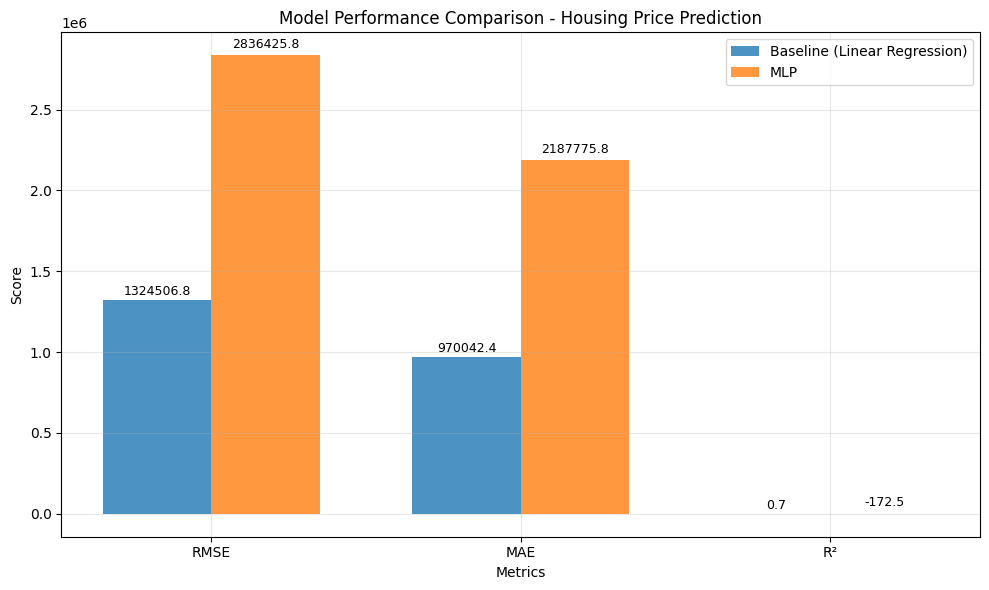

In [10]:
# 2. Performance comparison bar chart
plt.figure(figsize=(10, 6))

# Regression metrics (lower is better for MSE/RMSE/MAE, higher for R²)
metrics = ['RMSE', 'MAE', 'R²']
baseline_scores = [baseline_metrics['RMSE'], baseline_metrics['MAE'], baseline_metrics['R²']]
mlp_scores = [mlp_metrics['RMSE'], mlp_metrics['MAE'], mlp_metrics['R²']]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline (Linear Regression)', 
        color='#1f77b4', alpha=0.8)
plt.bar(x + width/2, mlp_scores, width, label='MLP', 
        color='#ff7f0e', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison - Housing Price Prediction')
plt.xticks(x, metrics)
plt.legend()

# Add value labels on top of bars
for i, metric in enumerate(metrics):
    plt.text(i - width/2, baseline_scores[i] + max(baseline_scores)*0.01, 
             f'{baseline_scores[i]:.1f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, mlp_scores[i] + max(mlp_scores)*0.01, 
             f'{mlp_scores[i]:.1f}', ha='center', va='bottom', fontsize=9)

# Invert RMSE and MAE axes (lower is better)
#plt.gca().invert_yaxis()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

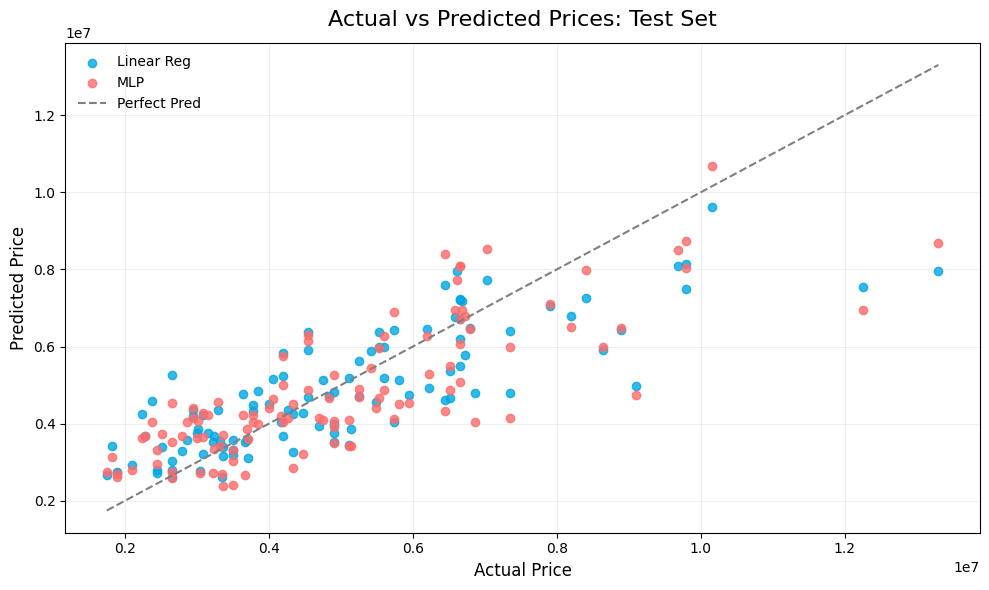

In [11]:


# Prection chart comparison 
# baseline_predictions, mlp_predictions are 1D arrays

plt.figure(figsize=(10, 6))

# Scatter for Linear Regression
plt.scatter(
    y_test, baseline_predictions,
    color="#00A7E1", label="Linear Reg", alpha=0.8
)

# Scatter for MLP
plt.scatter(
    y_test, mlp_predictions,
    color="#FF6B6B", label="MLP", alpha=0.8
)

# Perfect prediction line y = x
min_price = min(y_test.min(), baseline_predictions.min(), mlp_predictions.min())
max_price = max(y_test.max(), baseline_predictions.max(), mlp_predictions.max())
line = np.linspace(min_price, max_price, 100)
plt.plot(line, line, linestyle="--", color="gray", label="Perfect Pred")

# Labels and title
plt.title("Actual vs Predicted Prices: Test Set", fontsize=16, pad=12)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)

# Optional: nicer ticks (if values are in rupees)
# import matplotlib.ticker as mtick
# fmt = mtick.StrMethodFormatter('{x:,.0f}')
# plt.gca().xaxis.set_major_formatter(fmt)
# plt.gca().yaxis.set_major_formatter(fmt)

plt.legend(frameon=False)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Baseline Model Performance is better , since the data set is small , MLP is not suitable , MLP overfits on smaller datasets, will further explore for a larger datasets

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [12]:
analysis_text = """
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

The Primary objective of this assignment is do develop a Base line Linear regression & Multi-Layer Perceptron (MLP) Regression model without using high level libraries like ski lean.
The data set I have chosen to predict house price, the input features are area, bedrooms, bathrooms and categorical features like mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea

The baseline model used gradient descent to learn a single linear mapping from input features (such as area, bedrooms, and bathrooms) to the continuous target price. Its performance on the test set was strong, achieving RMSE around 1.32 million, MAE about 0.95 million, and an R² of approximately 0.66
 
For the dataset I have chosen, baseline model performed well better than MLP , Baseline Model Performance is better , since the data set is small , MLP is not suitable , MLP overfits on smaller datasets, DNN with multiple perceptron for simple problem is not suitable.
complex MLP is prone to overfitting and optimisation difficulties, while the simpler linear model remains stable and efficient. Overall, the experiments highlight that deeper models are not automatically better; model complexity must match data size and true underlying structure

Computational cost difference is very minor due to smaller data , Baseline training completed in 0.03s & MLP training completed in 0.12s , due to small dataset and linear the MLP tried multiple parameters hence the training is higher 

When I try to increase learning rate , MLP loss decrease not much , when increase the iterations the loss went upto .03 , however the RMSE, RME, R square I don’t see improvement 

Both models , observed the loss reduced after 100 iterations and after which the loss difference between consecutive 100th iterations is not improved much

Based on actual and predicted data as per the chart , house price until .6 million is better , fter which it looks like overfitting 

"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 371 words
✓ Analysis meets word count requirement


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [13]:
def get_assignment_results():
    """
    Return all assignment results in structured format.
    
    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """
    
    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.loss_history[0] 
    baseline_final_loss = baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.loss_history[-1]
    
    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,
        
        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'linear_regression',  # 'linear_regression', 'logistic_regression', or 'softmax_regression'
            'learning_rate': baseline_learning_rate,
            'n_iterations': baseline_n_iterations,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,
            
            # Metrics (fill based on your problem type)
            'test_accuracy': 0.0,      # For classification
            'test_precision': 0.0,     # For classification
            'test_recall': 0.0,        # For classification
            'test_f1': 0.0,            # For classification
            'test_mse': baseline_metrics['MSE'],            # For regression 
            'test_rmse': baseline_metrics['RMSE'],          # For regression
            'test_mae': baseline_metrics['MAE'],             # For regression
            'test_r2': baseline_metrics['R²'],              # For regression
        },
      
        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'total_parameters': 993,     # TODO: Calculate total weights + biases
            'learning_rate': mlp_learning_rate,
            'n_iterations': mlp_n_iterations,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,
            
            # Metrics
            'test_accuracy': 0.0,
            'test_precision': 0.0,
            'test_recall': 0.0,
            'test_f1': 0.0,
            'test_mse': mlp_metrics['MSE'],
            'test_rmse': mlp_metrics['RMSE'],
            'test_mae': mlp_metrics['MAE'],
            'test_r2': mlp_metrics['R²'],
        },
        
        # ===== Comparison =====
        'improvement': abs(baseline_metrics['RMSE']-mlp_metrics['RMSE']),            # MLP primary_metric - baseline primary_metric
        'improvement_percentage': (mlp_metrics['RMSE']-baseline_metrics['RMSE'])/baseline_metrics['RMSE'] * 100,  # (improvement / baseline) * 100
        'baseline_better': True,       # True if baseline outperformed MLP
        
        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': False,  # Optional: True if converged
        'mlp_converged': False,
    }
    
    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [14]:
# Test the output
import json

try:
    results = get_assignment_results()
    
    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)
    
    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better', 
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")
    
    check_dict(results)
    
    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")
        
except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "House Prices",
  "dataset_source": "Kaggle",
  "n_samples": 545,
  "n_features": 13,
  "problem_type": "regression",
  "problem_statement": "To predict the price of a house based on various features like area, bedrooms, bathrooms, etc.",
  "primary_metric": "mse,rmse,mae",
  "metric_justification": "MAE -Choosen since its robust to outliers, RMSE & MSE Square errors for senstivity to large errors",
  "train_samples": 436,
  "test_samples": 109,
  "train_test_ratio": 0.8,
  "baseline_model": {
    "model_type": "linear_regression",
    "learning_rate": 0.0125,
    "n_iterations": 1000,
    "initial_loss": 1.0,
    "final_loss": 0.3140561011560307,
    "training_time_seconds": 0.01776289939880371,
    "test_accuracy": 0.0,
    "test_precision": 0.0,
    "test_recall": 0.0,
    "test_f1": 0.0,
    "test_mse": 1754318206109.4983,
    "test_rmse": 1324506.7784309366,
    "test_mae": 970042.389593185,
    "test_r2": 0.6529243594204777
  },
  "m

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**